In [2]:
import pandas as pd # data processing
import numpy as np # linear algebra
import folium # mapping
from folium import plugins
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import tensorflow.keras.backend as be

import pickle

%matplotlib inline

In [3]:
# read crimes file
df = pd.read_csv('boston_corrected.csv')

price = df['CMEDV']

# Account for the error in the original dataset
# Not Accurate!

lon_correct = 0.01
lat_correct = 0.152

df['LON'] -= lon_correct
df['LAT'] += lat_correct

m = folium.Map(location = [42.320,-71.05], #Initiate map on Boston city
                  zoom_start = 11,
                  min_zoom = 11
)


#m.crs = "+proj=laea +lat_0=45 +lon_0=-100 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs"

# plot heatmap
m.add_child(plugins.HeatMap(df[['LAT','LON']], radius=16))

m

In [4]:
df = pd.read_csv('boston_corrected.csv')

lon = df['LON']
lat = df['LAT']

lon = lon.to_numpy()
lat = lat.to_numpy()

# import plotly.express as px

# fig = px.histogram(df, x="LAT")
# fig.show()

lon_min = -71.2
lon_max = -70.9
lon_num = 300

lon = np.linspace(lon_max, lon_min, num=lon_num)

lat_min = 42.1
lat_max = 42.325
lat_num = 225

lat = np.linspace(lat_min, lat_max, num=lat_num)

In [5]:
latlon_2D = np.zeros((lon_num, lat_num, 2))

for i in range(lon_num):
    for j in range(lat_num):
        latlon_2D[i, j] = (lon[i], lat[j])

In [6]:
print(latlon_2D)

[[[-70.9         42.1       ]
  [-70.9         42.10100446]
  [-70.9         42.10200893]
  ...
  [-70.9         42.32299107]
  [-70.9         42.32399554]
  [-70.9         42.325     ]]

 [[-70.90100334  42.1       ]
  [-70.90100334  42.10100446]
  [-70.90100334  42.10200893]
  ...
  [-70.90100334  42.32299107]
  [-70.90100334  42.32399554]
  [-70.90100334  42.325     ]]

 [[-70.90200669  42.1       ]
  [-70.90200669  42.10100446]
  [-70.90200669  42.10200893]
  ...
  [-70.90200669  42.32299107]
  [-70.90200669  42.32399554]
  [-70.90200669  42.325     ]]

 ...

 [[-71.19799331  42.1       ]
  [-71.19799331  42.10100446]
  [-71.19799331  42.10200893]
  ...
  [-71.19799331  42.32299107]
  [-71.19799331  42.32399554]
  [-71.19799331  42.325     ]]

 [[-71.19899666  42.1       ]
  [-71.19899666  42.10100446]
  [-71.19899666  42.10200893]
  ...
  [-71.19899666  42.32299107]
  [-71.19899666  42.32399554]
  [-71.19899666  42.325     ]]

 [[-71.2         42.1       ]
  [-71.2         42.1010

# Nikita Neural Net Model

Input scaler:  2  is  ['LON', 'LAT', 'DIS']  with key:  DIS
Input scaler:  3  is  ['LON', 'LAT', 'DIS', 'TRACT']  with key:  TRACT
Input scaler:  4  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM']  with key:  RM
Input scaler:  5  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS']  with key:  INDUS
Input scaler:  6  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX']  with key:  NOX
Input scaler:  7  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT']  with key:  LSTAT
Input scaler:  8  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN']  with key:  ZN
Input scaler:  9  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO']  with key:  PTRATIO
Input scaler:  10  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO', 'CMEDV']  with key:  CMEDV
LAT


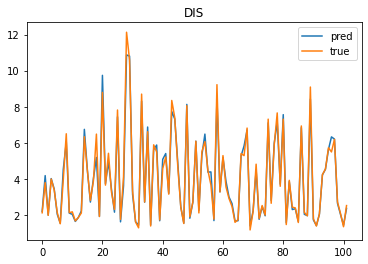

Model  0  has  2 vars:  ['LON', 'LAT']
DIS


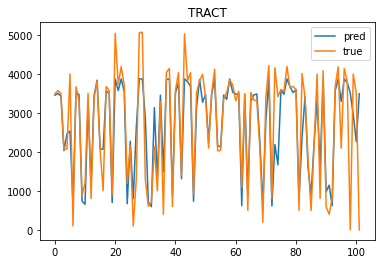

Model  1  has  3 vars:  ['LON', 'LAT', 'DIS']
TRACT


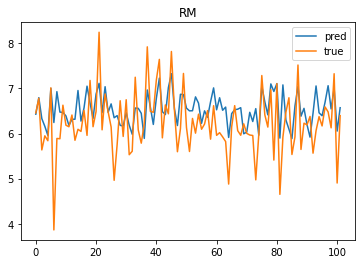

Model  2  has  4 vars:  ['LON', 'LAT', 'DIS', 'TRACT']
RM


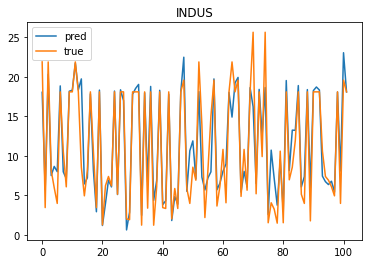

Model  3  has  5 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM']
INDUS


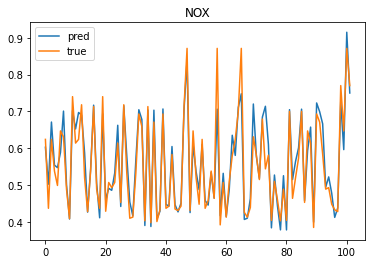

Model  4  has  6 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS']
NOX


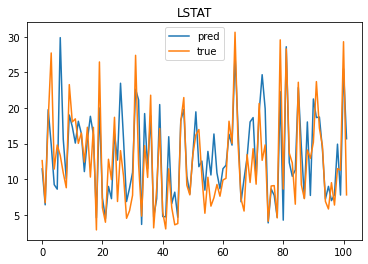

Model  5  has  7 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX']
LSTAT


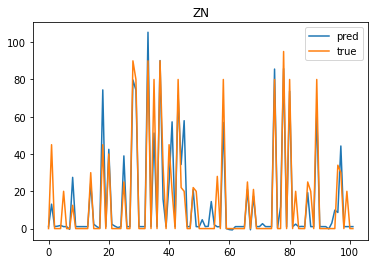

Model  6  has  8 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT']
ZN


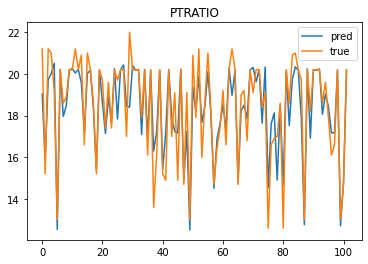

Model  7  has  9 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN']
PTRATIO


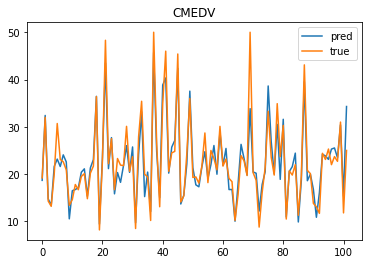

Model  8  has  10 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO']


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import tensorflow.keras.backend as be

df = pd.read_csv("boston_corrected.csv")
train_set, test_set = train_test_split(df, test_size=0.2, random_state=26)

input_vars = ["LON", "LAT"]
output_vars = ['DIS', "TRACT", "RM","INDUS",'NOX', 'LSTAT',"ZN", 'PTRATIO', 'CMEDV']

INPUT_SCALER = StandardScaler()
INPUT_SCALER.fit(df[input_vars].values)

input_scalers = {"LAT": INPUT_SCALER}
current_vars =["LON", "LAT"] 
for output in output_vars:
    current_vars.append(output)
    INPUT_SCALER_n = StandardScaler()
    INPUT_SCALER_n.fit(df[current_vars].values)
    

    input_scalers[output] = INPUT_SCALER_n
    print("Input scaler: ", len(input_scalers), " is ", current_vars, " with key: ",output )


INPUT = INPUT_SCALER.transform(train_set[input_vars])
INPUT_TEST = INPUT_SCALER.transform(test_set[input_vars])

def QuadLoss():
    pass
def CreateModel(inSize):
    model = keras.models.Sequential()

    #model.add(keras.Input(shape=inSize))
    model.add(keras.layers.Dense(inSize))

    model.add(keras.layers.Dense(40, activation='relu'))

    model.add(keras.layers.Dense(40, activation='sigmoid'))
    #model.add(keras.layers.Dense(40, activation='sigmoid'))
    model.add(keras.layers.Dense(40, activation='relu'))
    #model.add(keras.layers.Dense(40, activation='selu'))
    model.add(keras.layers.Dense(1))
    model.compile(loss="mse", optimizer="adam", metrics=["mean_squared_error"])

    return model

def TrainModel(model, input_vars, output_var, epochs, batch_size):
    
    #Scale and create our output data
    #OUT_SCALER = StandardScaler()
    #OUT_SCALER.fit(df[output_var])
    
    most_recent = input_vars[len(input_vars)-1]
    
    print(most_recent)
    
    OUTPUT = train_set[output_var].values#OUT_SCALER.transform(train_set[output_var])
    
    input_scaler = input_scalers[most_recent]
    
    ThisInput = input_scaler.transform(train_set[input_vars].values)
    
    model.fit(ThisInput, OUTPUT, epochs=epochs, batch_size=batch_size, verbose=0)
    
    InputTest = input_scaler.transform(test_set[input_vars])
    model_predict = model.predict(InputTest)
    
    #model_predict = OUT_SCALER.inverse_transform(model_predict_scaled)
    
    return model_predict

def TrainAndTest(input_vars, output_var):
    model = CreateModel(len(input_vars))
    predict_vals = TrainModel(model,input_vars, output_var, 100, 10)
    plt.title(output_var)
    plt.plot(predict_vals, label="pred")
    plt.plot(test_set[output_var].values, label="true")
    plt.legend()
    
    plt.show()
    return model

this_input_vars =  ["LON", "LAT"]

all_models = []


for i, var in enumerate(output_vars):
    all_models.append(TrainAndTest(this_input_vars, var))
    
    print("Model ", i , " has ", len(this_input_vars), "vars: ", this_input_vars)
    
    this_input_vars.append(var)

In [11]:
map = mpimg.imread('map.png')
minLon = min(df["LON"].values)
maxLon = max(df["LON"].values)
minLat = min(df["LAT"].values)
maxLat = max(df["LAT"].values)


def latLonToXY(lat, lon):
    
    lonScale = 2300
    dLon = 250
    latScale = 3200
    dLat = 280
    
    return (lon-minLon) * lonScale + dLon, map.shape[1] - ((lat-minLat) * latScale + dLat)


def XYToLat(x,y):
    #x = (lon-minLon) * lonScale + dLon
    #lon = (x - dLon)/lonScale + minLon
    #y = height - ((lon-minLon) * lonScale + dLon)
    #lon = (x - dLon)/lonScale + minLon
    lonScale = 2300
    dLon = 250
    latScale = 3200
    dLat = 280
    
    lon = (x - dLon)/lonScale + minLon
    lat = (map.shape[1]-y - dLat)/latScale + minLat
    return lon, lat

def CreateModelMask(model, scaler, gridSize=100, other_masks=None, maskCut=0):
    
    height = int(map.shape[0] / gridSize)
    width = int(map.shape[1] / gridSize)
    print(width * height)
   # result = np.zeros((height, width, 4))

    extra_vars_len = maskCut

    result = np.zeros((height, width))
    LONLAT = np.zeros((height*width, 2+extra_vars_len))
    
    
    j = 0
    for x in range(width):
        for y in range(height):
            
            vals = np.zeros(2 + extra_vars_len)
            lon,lat = XYToLat(x*gridSize,y*gridSize)
            vals[0] = lon
            vals[1] = lat
            
            for i in range(extra_vars_len):
                vals[i+2] = other_masks[y,x, i]
                #vals = 0,0,0
            
            LONLAT[j,:] =  vals
          #  print(x,y, " and", LONLAT[i])
            #print(j,LONLAT[j,:])
            j+=1
            #lon, lat = XYToLat(x,y)
            #val = model.predict(INPUT_SCALER.transform([[lon, lat]]))
            #print(val[0,0])
            #if(val > 5000):
            #result[y,x] = val
    
    #print(LONLAT)
    scaled = scaler.transform(LONLAT)
    print(LONLAT.shape)
    predict =  model.predict(scaled)
    #print(predict)
    i=0
    for x in range(width):
        for y in range(height):
            result[y,x] = predict[i]
            i+=1
            #print(result[y,x])
    #print(min(predict))
    #print(max(predict))
    return result

In [12]:
def CreateAllMasks(models, gridSize=20):
    
    height = int(map.shape[0] / gridSize)
    width = int(map.shape[1] / gridSize)
    
    each_mask = np.zeros((height, width, len(output_vars)))
    
    this_output = ["LAT"] + output_vars
    #this_outputappend(output_vars)
    
    print(this_output)
    #We iterate each variable, our model 'i' will predict
    for i,var in enumerate(this_output):
        if(i == len(this_output)-1):
            break
        print(var,i)

        #we get the model that tries to find the current var
        model = models[i]
        #get the current scaler
        scaler = input_scalers[var]
        print(model, ",", i )
        cur_mask = CreateModelMask(models[i], scaler, gridSize, each_mask, i)
        each_mask[:,:,i] = cur_mask
    return each_mask

end_mask = CreateAllMasks(all_models)

['LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO', 'CMEDV']
LAT 0
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3b33e2a3d0> , 0
4575
(4575, 2)
DIS 1
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3afc308670> , 1
4575
(4575, 3)
TRACT 2
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3afc329d60> , 2
4575
(4575, 4)
RM 3
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3b30379340> , 3
4575
(4575, 5)
INDUS 4
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3abdba2f10> , 4
4575
(4575, 6)
NOX 5
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3ae4234310> , 5
4575
(4575, 7)
LSTAT 6
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3abb1833a0> , 6
4575
(4575, 8)
ZN 7
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f3ab9d73f10> , 7
4575
(4575, 9)
PTRATIO 8
<tensorflow.python.keras.engine.sequential.Sequential object at 0

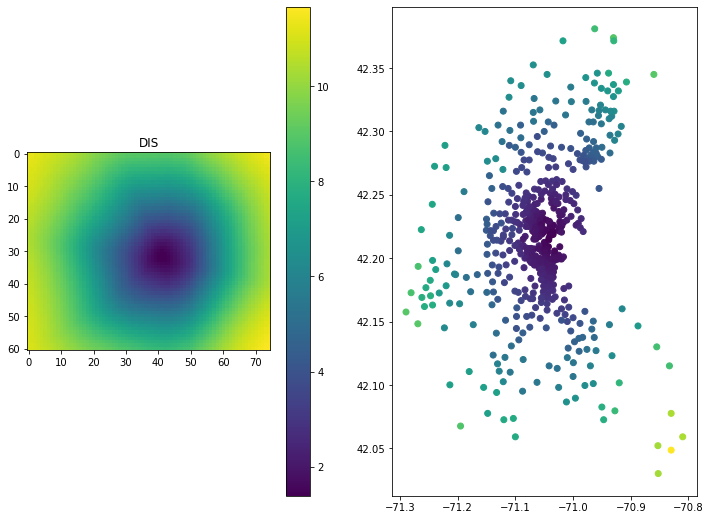

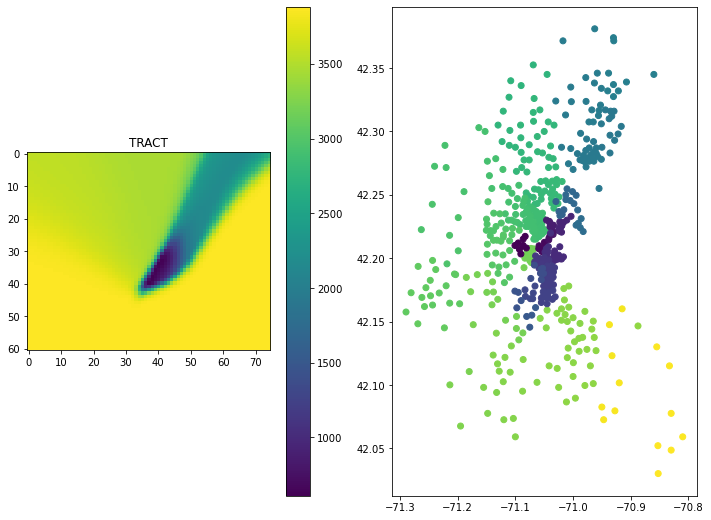

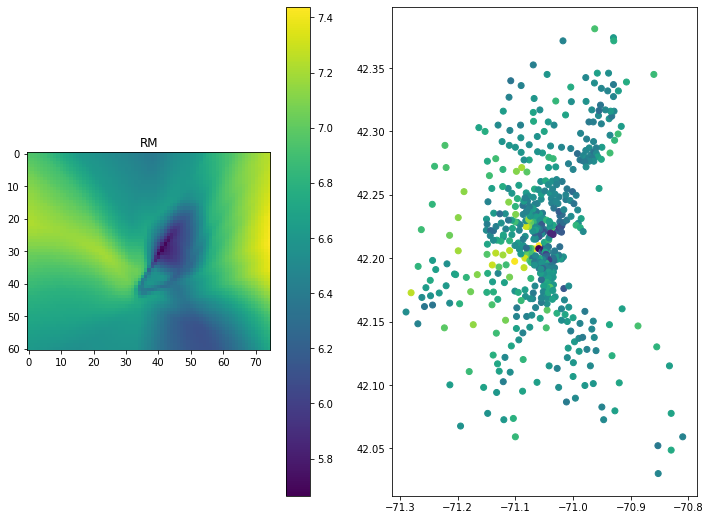

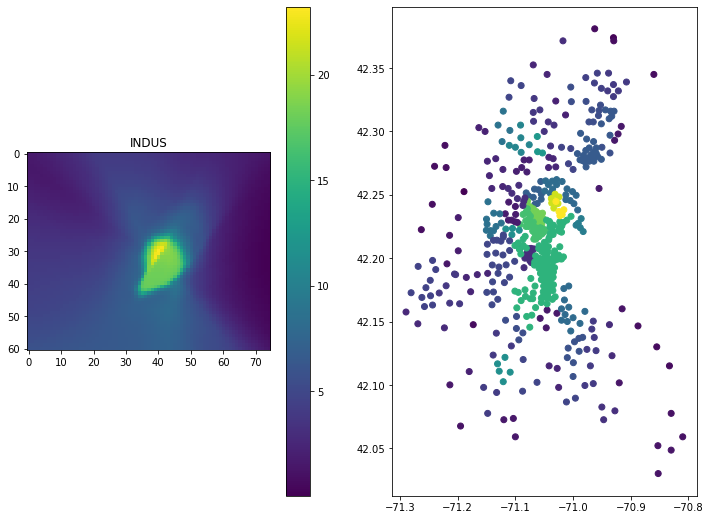

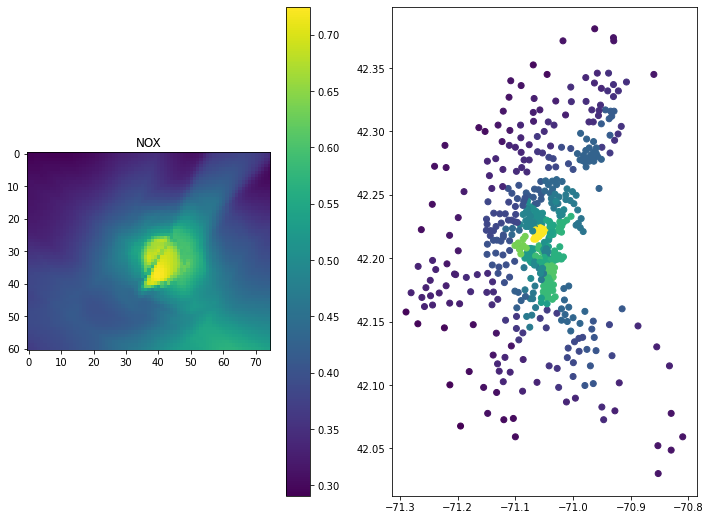

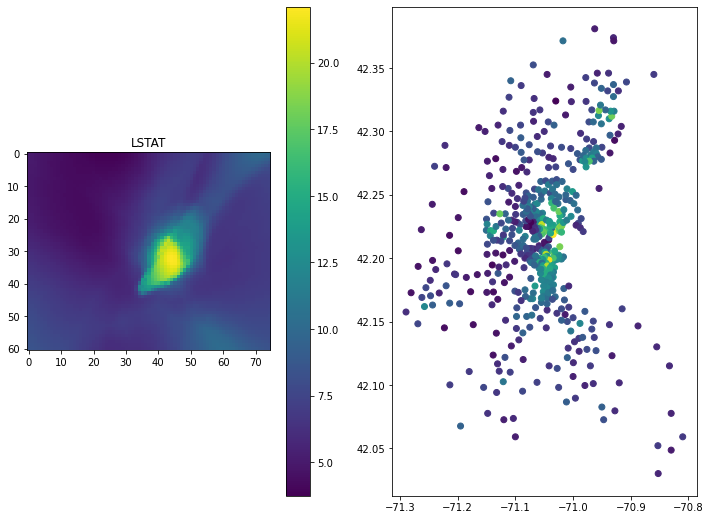

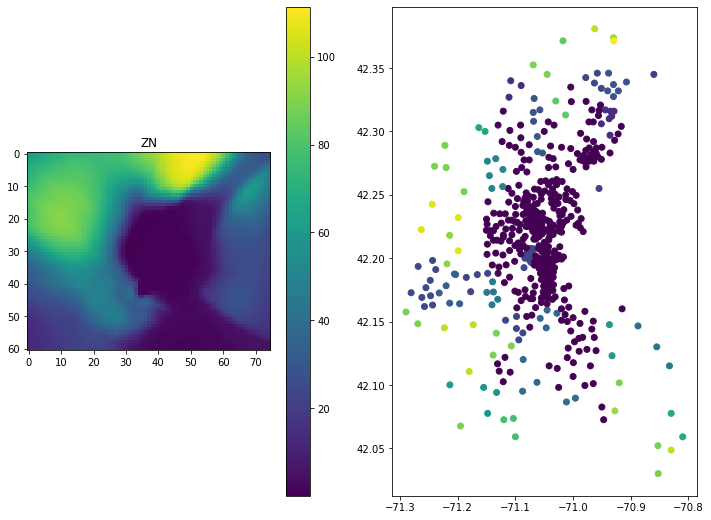

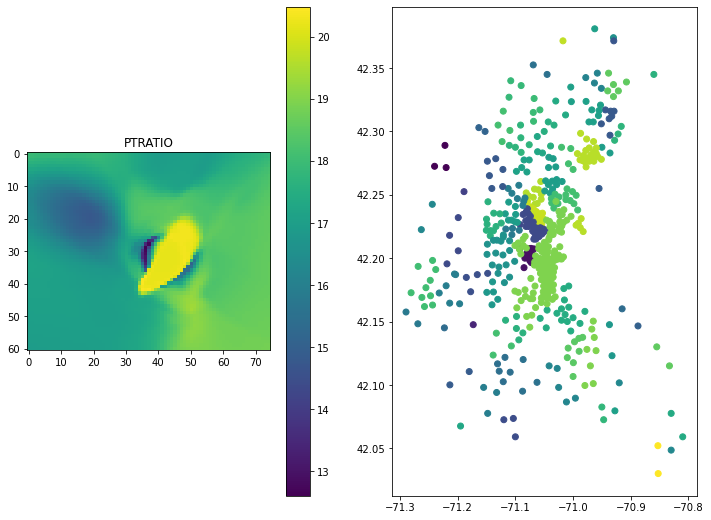

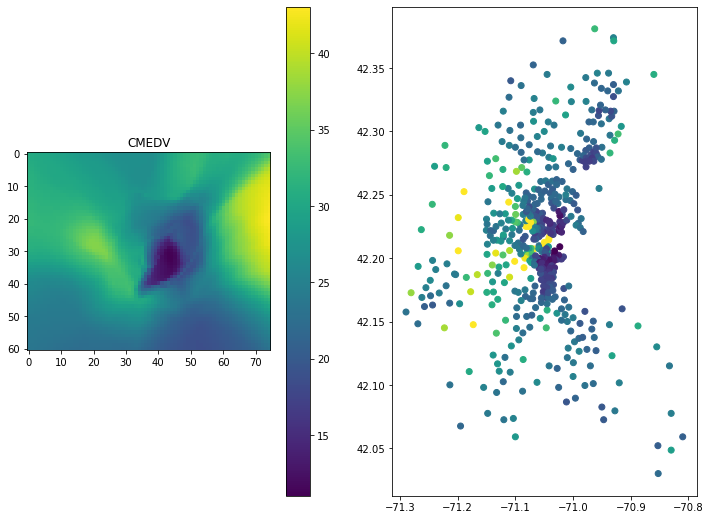

In [13]:
N = len(output_vars)
subX = int(np.sqrt(N))

#fig = plt.figure(figsize=(12,9))

for i in range(N):
    #ax = fig.add_subplots(N,N,i+1)
    fig = plt.figure(figsize=(12,9))
    ax1 = fig.add_subplot(1,2,1)

    ax1.set_title(output_vars[i])
    im = ax1.imshow(end_mask[:,:,i])
    fig.colorbar(im)

    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(df["LON"].values, df["LAT"].values, c=df[output_vars[i]].values)

    plt.show()

In [14]:
def GetValsFromLongLat(lon, lat):

    vals = [lon, lat]
    current_scale = ["LAT"] + output_vars
    results = {}

    for i, var in enumerate(output_vars):
        if(i == len(output_vars)-2):
            break
        #print(i)
        model = all_models[i]
        scaler = input_scalers[current_scale[i]]

        vals_2 = np.array(vals)
        #print("lol", vals_2)


        predict = model.predict(scaler.transform([vals_2]))[0,0]
        #print(var, " : ", predict)
        vals.append(predict)
        results[var] = predict
    return results